In [141]:
import json
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import collections, colors, transforms
from pprint import pprint
import statistics
from datetime import datetime
import os

In [194]:
## class for extracting the repo is written here!

class Analyser:
    
    def __init__(self,repo,user):
        self.repo = repo
        self.user = user
        self.repofile = f'{repo}_users_repo_complete_data.json'
        print(self.repo,self.user,self.repofile)
    
    def getFileData(self,filename = ""):
        RepoData = {}
        if filename == "":
            with open(f"ui/data/{self.repofile}",) as inpFile:
                RepoData = json.load(inpFile)
            return RepoData
        else:
            with open(f"ui/data/{filename}",) as inpFile:
                RepoData = json.load(inpFile)
            return RepoData
    
    def ContributorsChart(self,Z, filename):
        plt.figure(figsize=(20,3))
        plt.pcolormesh(Z, cmap='YlGn')
        plt.title('Contribution chart', fontweight ="bold")
        ax = plt.gca;
        days = ["Sat", "Fri", "Thur", "Wed", "Tues", "Mon", "Sun"];
        plt.yticks(np.arange(0.5, 7.5, step=1), days)
        plt.savefig(filename, dpi=600, bbox_inches='tight', pad_inches=0)
        plt.show()

    def ContributorsContributionGraph(self):
        np_contribution_data = []
        repoData = self.getFileData()
        totalContributor = len(repoData)
        for userData in repoData.values():
            contribution_details = userData["contributions"]["data"]["user"]["contributionsCollection"]["contributionCalendar"]["weeks"]
            #pprint(contribution_details)
            
            contribution_data = []
            
            for weeklydict in contribution_details:
                weeklyContribution = []
                weeklyData = weeklydict['contributionDays']
                
                for dailydict in weeklyData:
                    weeklyContribution.append(dailydict['contributionCount'])
                
                while len(weeklyContribution) < 7:
                    weeklyContribution.append(0)
                
                contribution_data.append(weeklyContribution)
            temp = np.transpose(np.array(contribution_data)) 
            #print(temp)
            np_contribution_data.append(temp)
        
        avg_data = np.zeros((7,53),dtype = int)
        
        for data in np_contribution_data:
            avg_data = avg_data.__add__(data)
        
        avg_data = np.true_divide(avg_data,totalContributor)
        
        self.ContributorsChart(avg_data,"contrichart")
    
    def languageData(self):
        repoData = self.getFileData(f"{self.repo}_main_data.json")
        
        repo_languages = repoData['languages']
        
        languagesList = []
        languagePerList = []
        totalLine = 0
        for key,value in repo_languages.items():
            languagesList.append(key)
            languagePerList.append(value)
            totalLine +=value
            
        languagePerList[:] = ["{0:.2f}%".format(x*100 / totalLine) for x in languagePerList]
        print(languagesList,languagePerList)
        
        
    def ContributerTypeData(self):
        
        data = self.getFileData()
        userTypeDict = {}
        userList = []
        userTypeList = []
        
        for user, userdata in data.items():
            
            if userdata["company"] is not None:
                if "Professional" not in userTypeDict.keys():
                    userTypeDict["Professional"] = 1
                else:
                    userTypeDict["Professional"] += 1
            else:
                if userdata['type'] not in userTypeDict.keys():
                    userTypeDict[userdata['type']] = 1
                else:
                    userTypeDict[userdata['type']] += 1
        print(userTypeDict)  
        total_accounts = 0
        for key,values in userTypeDict.items():
            userTypeList.append(key)
            userList.append(values)
            total_accounts += values
        
        userList[:] = ["{0:.2f}%".format(x*100/total_accounts) for x in userList]
        return userTypeList, userList        
     
    def CommitsPerDayAvg(self):
        
        repoData = self.getFileData()
        totalContributor = len(repoData)
        commitsList = []
        for userData in repoData.values():
            total_days = 0
            commit = 0
            contribution_details = userData["contributions"]["data"]["user"]["contributionsCollection"]["contributionCalendar"]["weeks"]
            for weeklydict in contribution_details:
                for dailydict in weeklydict['contributionDays']:
                    total_days += 1
                    commit += (dailydict['contributionCount'])
            
            commitsList.append(commit/ total_days)
        
        commits_stdev = statistics.stdev(commitsList)
        commits_mean = statistics.mean(commitsList)
        
        lower_limit = commits_mean - commits_stdev if commits_mean - commits_stdev > 0 else 0
        upper_limit = commits_mean + commits_stdev
        
        print(lower_limit,upper_limit)
        
        return "{0:.2f}".format(lower_limit), "{0:.2f}".format(upper_limit)
    
    def OpenSourceProjectCount(self):
        repoData = self.getFileData()
        totalContributor = len(repoData)
        projectCountList = []
        for userData in repoData.values():
            repos = len(userData['repos'].values())
            projectCountList.append(repos)
            print(repos)
            
        project_stdev = statistics.stdev(projectCountList)
        project_mean = statistics.mean(projectCountList)
        
        lower_limit = project_mean - project_stdev if project_mean - project_stdev > 0 else 0
        upper_limit = project_mean + project_stdev
        
        print(lower_limit,upper_limit)
        
        return "{0:.2f}".format(lower_limit), "{0:.2f}".format(upper_limit)
    
    def UserPublicRepoCount(self):
        repoData = self.getFileData()
        totalContributor = len(repoData)
        projectCountList = []
        for userData in repoData.values():
            repos = userData['public_repos']
            projectCountList.append(repos)
            print(repos)
            
        project_stdev = statistics.stdev(projectCountList)
        project_mean = statistics.mean(projectCountList)
        
        lower_limit = project_mean - project_stdev if project_mean - project_stdev > 0 else 0
        upper_limit = project_mean + project_stdev
        
        print(lower_limit,upper_limit)
        
        return "{0:.2f}".format(lower_limit), "{0:.2f}".format(upper_limit)        
     
    def AccountAge(self):
        repoData = self.getFileData()
        totalContributor = len(repoData)
        projectCountList = []
        today = datetime.utcnow().year
        for userData in repoData.values():
            date = int(userData['created_at'].split('-')[0])
            projectCountList.append(today - date)
            print(date)
            
        project_stdev = statistics.stdev(projectCountList)
        project_mean = statistics.mean(projectCountList)
        
        lower_limit = project_mean - project_stdev if project_mean - project_stdev > 0 else 0
        upper_limit = project_mean + project_stdev
        
        print(lower_limit,upper_limit)
        
        return "{0:.2f}".format(lower_limit), "{0:.2f}".format(upper_limit)
    
    def FollowersCount(self):
        repoData = self.getFileData()
        totalContributor = len(repoData)
        projectCountList = []
        for userData in repoData.values():
            repos = userData['followers']
            projectCountList.append(repos)
            print(repos)
            
        project_stdev = statistics.stdev(projectCountList)
        project_mean = statistics.mean(projectCountList)
        
        lower_limit = project_mean - project_stdev if project_mean - project_stdev > 0 else 0
        upper_limit = project_mean + project_stdev
        
        print(lower_limit,upper_limit)
        
        return "{0:.2f}".format(lower_limit), "{0:.2f}".format(upper_limit)
     
    
    def getExtension(self,path):
        filename, file_extension = os.path.splitext(path)
        return file_extension
    
    def TypeClassfier(self,extension):
        
        if extension == '.ts':
            return "typescript"
        elif extension == '.md' or extension == '.txt':
            return "documentation"
        elif extension == '.cpp' or extension == 'cxx':
            return "c++"
        elif extension == '.c' or extension == '.h':
            return "c"
        elif extension == '.html':
            return "html"
        elif extension == '.js':
            return "javascript"
        elif extension == '.css':
            return "css"
        elif extension == '.py':
            return "python"
        elif extension == '.java':
            return "java"
        else:
            return "others"
        
    
    def FileTypeAnalyser(self):
        repoData = self.getFileData()
        usersAvg_dict = {}
        total_users = len(repoData.keys())
        
        for userData in repoData.values():
            
            usersRepo = userData['repos']
            #pprint(usersRepo)
            repo_file_dict = {}
            total_user_repos = len(usersRepo.keys())
            for data in usersRepo.values():
                file_dict = {}
                commitData = data['commit_files']
                total_files = len(commitData)
                if total_files == 0:
                    total_user_repos -= 1
                    continue
                
                for commit in commitData:
                    extension = self.getExtension(commit['filename'])
                    #print(extension)
                    filetype = self.TypeClassfier(extension)
                    
                    if filetype not in file_dict.keys():
                        file_dict[filetype] = 1
                    else:
                        file_dict[filetype] += 1
                t2 = 0
                for key,values in file_dict.items():
                    file_dict[key] = values/ total_files
                    t2 += file_dict[key]
                    if key not in repo_file_dict.keys():
                        repo_file_dict[key] = file_dict[key]
                    else:
                        repo_file_dict[key] += file_dict[key]
            t1 = 0    
            for key,values in repo_file_dict.items():    
                repo_file_dict[key] = values/ total_user_repos
                t1 += repo_file_dict[key]
                if key not in usersAvg_dict.keys():
                    usersAvg_dict[key] = repo_file_dict[key]
                else:
                    usersAvg_dict[key] += repo_file_dict[key]
    
        total = 0
        fileNameList = []
        filePercentList = []
        for key,value in usersAvg_dict.items():
            usersAvg_dict[key] = value/total_users
            total += usersAvg_dict[key]
            
            fileNameList.append(key)
            filePercentList.append("{0:.2f}".format(usersAvg_dict[key]))
            
        print(fileNameList,filePercentList)
            


In [195]:
analyser = Analyser("SE-gamedev","arpit1912")
#analyser.ContributorsContributionGraph()
#analyser.ContributerTypeData()
#analyser.CommitsPerDayAvg()
#analyser.OpenSourceProjectCount()
#analyser.UserPublicRepoCount()
#analyser.AccountAge()
#analyser.FollowersCount()
analyser.FileTypeAnalyser()

SE-gamedev arpit1912 SE-gamedev_users_repo_complete_data.json
user's repo 
user's repo 
['typescript', 'html', 'others', 'documentation', 'java', 'javascript', 'css', 'python'] ['0.23', '0.03', '0.45', '0.06', '0.03', '0.16', '0.01', '0.03']


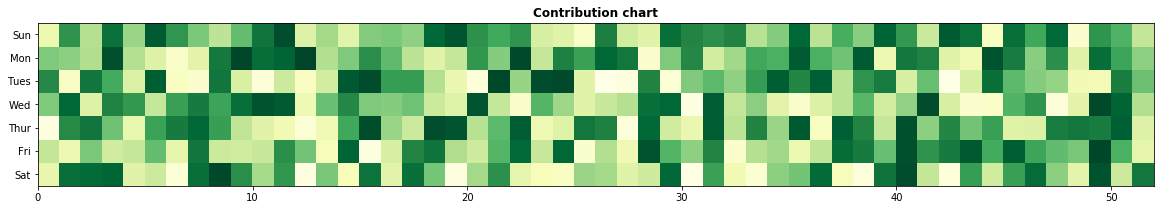

In [33]:
Z = np.random.rand(7, 52)
ContributorsChart(Z, "contrichart")